## Employee Turnover Prediction

In [49]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# reading data from csv file
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# renaming a column as well as looking at data type
data = data.rename(columns = {'sales':'department'})
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [7]:
# getting familiar with size of data
data.shape

(14999, 10)

In [8]:
# finding all unique categorical values
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
# adding all the “technical”, “support” and “IT” columns into one column for making analysis easier. 
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])

In [10]:
# dummy variable creation
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    hr1=data.join(cat_list)
    data=hr1

In [11]:
## dropping column that is of no use now since dummy variables are being created
data.drop(data.columns[[8, 9]], axis=1, inplace=True)
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [17]:
# feature selection
y = ['left']
x = [ i for i in data.columns if i not in y]
model = LogisticRegression() # created an estimator for which we need to do feature selection
rfe = RFE(model,10)
rfe.fit(data[x],data[y])

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [18]:
# let us see which 10 are selected out of 18 features
print(rfe.support_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]


In [19]:
# ranking of each feature (1: selected, >1:not selected and ranked as per importance) 
print(rfe.ranking_)

[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [20]:
# selecting columns as per rfe
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=data[cols]
y=data['left']

In [24]:
# traintest split as well as fitting data to logistic regression estimator
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=28)
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [42]:
## evaluating other metrics
print("accuracy=",accuracy_score(y_test,model1.predict(x_test)))
print("confusion matrix =")
print(confusion_matrix(y_test,model1.predict(x_test)))
print("precision=",precision_score(y_test,model1.predict(x_test)))
print("recall=",recall_score(y_test,model1.predict(x_test)))

accuracy= 0.7643333333333333
confusion matrix =
[[2121  165]
 [ 542  172]]
precision= 0.5103857566765578
recall= 0.24089635854341737


In [36]:
# checking accuracy over another model estimator
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
## evaluating other metrics
print("accuracy=",accuracy_score(y_test,model2.predict(x_test)))
print("confusion matrix =")
print(confusion_matrix(y_test,model2.predict(x_test)))
print("precision=",precision_score(y_test,model2.predict(x_test)))
print("recall=",recall_score(y_test,model2.predict(x_test)))

accuracy= 0.981
confusion matrix =
[[2264   22]
 [  35  679]]
precision= 0.9686162624821684
recall= 0.9509803921568627


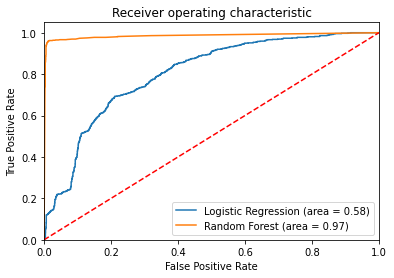

In [50]:
# auc roc score for both the models
model1_roc_auc = roc_auc_score(y_test, model1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
model2_roc_auc = roc_auc_score(y_test, model2.predict(x_test))
model2_fpr, model2_tpr, model2_thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model1_roc_auc)
plt.plot(model2_fpr, model2_tpr, label='Random Forest (area = %0.2f)' % model2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()